In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Ссылка на данные: https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/MASS/Boston.csv

Ссылка на описание данных: https://raw.github.com/vincentarelbundock/Rdatasets/master/doc/MASS/Boston.html

In [3]:
boston = pd.read_csv('boston.csv', sep=',', header=0, index_col=0)
boston.shape

(506, 14)

In [4]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Описание признаков

1. crim - уровень преступности на душу населения 
2. zn - доля жилых зон площадью больше 25 000 квадратных футов 
3. indus - доля неторговых территорий во владении бизнеса на пригороде
4. chas - район прилегает к реке Чарльз (= 1 если прилегает; 0 иначе). 
5. nox - концентрация окисей азота (доля от 10 миллионов). 
6. rm - среднее число комнат в жилище 
7. age - доля единиц жилья с проживащим собственником, построенных до 1940 года
8. dis - взвешеннное среднее расстояние до 5 рабочих центров бостона 
9. rad - индекс доступности радиальных автомагистралей
10. tax - отношение имущественноо налога к 10 000 \$
11. ptratio - отношение числа учащихся к числу учителей в пригороде
12. black = 1000(Bk - 0.63)^2, где Bk - доля афроамериканцев среди населения
13. lstat - процент бедного населения
14. medv - медиана стоимости домов с проживающим собственником в тысячах

In [5]:
boston = boston.astype(float)
target_column = boston.columns[-1]

In [6]:
def plot_feature_target(X, y):
    fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20,4))
    for i in xrange(X.shape[1]):
        row_index = i//7
        col_index = i%7
        axes[row_index, col_index].plot(X[:, i], y, '.')
        axes[row_index, col_index].set_xlabel(boston.columns[i])
        axes[row_index, col_index].set_ylabel(target_column)
        axes[row_index, col_index].set_xticks([])
        axes[row_index, col_index].set_yticks([])

    axes[1, 6].hist(y)
    axes[1, 6].set_xticks([])
    axes[1, 6].set_yticks([])
    axes[1, 6].set_xlabel(target_column)
    plt.show()

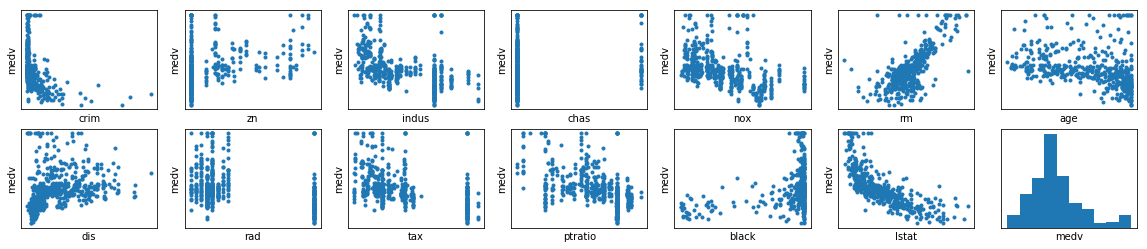

In [7]:
plot_feature_target(boston.drop(target_column, axis=1).values, boston[target_column].values)

Проверим межпризнаковую корреляцию.

In [8]:
boston.corr('pearson')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


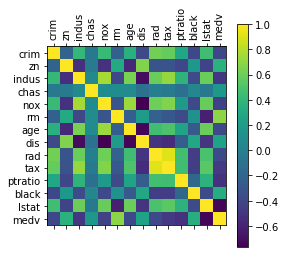

In [9]:
plt.matshow(boston.corr('pearson'))
plt.colorbar()
plt.xticks(range(boston.shape[1]),boston.columns.values, rotation='vertical')
plt.yticks(range(boston.shape[1]),boston.columns.values)
plt.show()

Заметим, что корреляция между признаками rad и tax составила более 90% и оба признака примерно одинаково коррелируют с целевым признаком.

Отшкалируем данные, чтобы сделать признаки "равнозначными" для моделей.

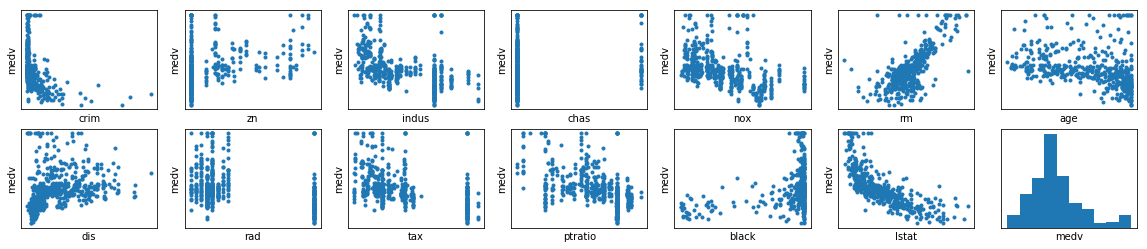

In [10]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(boston.drop(target_column, axis=1))
y = boston[target_column].values

plot_feature_target(X, y)

Разделим на обучающую и тестовую выборки.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print(X_train.shape)
print(X_test.shape)

(339L, 13L)
(167L, 13L)


Проверим, что распределения в обучающей и тестовой выборках примерно совпадают.

Обучающая выборка:


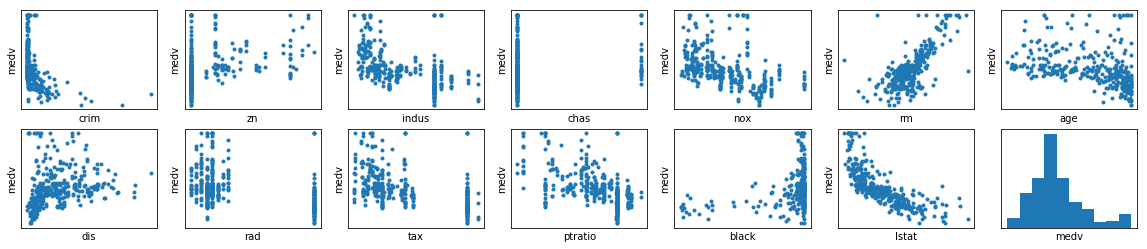

Тестовая выборка: 


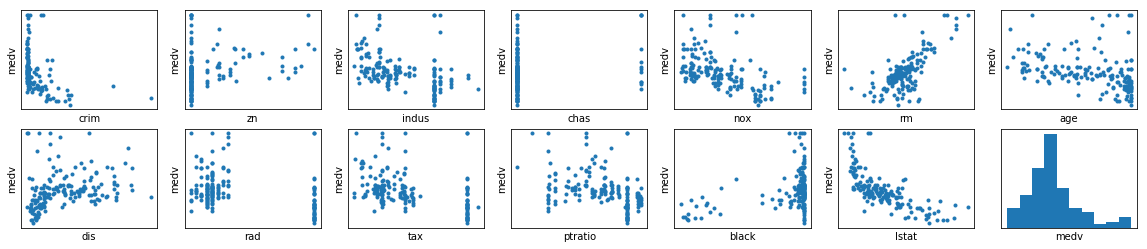

In [12]:
print('Обучающая выборка:')
plot_feature_target(X_train, y_train)

print('Тестовая выборка: ')
plot_feature_target(X_test, y_test)

Обучим линейную регрессионную модель.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score

linreg = LinearRegression(n_jobs=4)
linreg.fit(X_train, y_train)
y_train_linreg = linreg.predict(X_train)
y_test_linreg = linreg.predict(X_test)

print('MSE на обучающей выборке: %.4f' % mean_squared_error(y_train, y_train_linreg))
print('MSE на тестовой выборке: %.4f' % mean_squared_error(y_test, y_test_linreg))

print('\nДоля объясненной диспперсии на обучающей выборке: %.4f' % explained_variance_score(y_train, y_train_linreg))
print('Доля объясненной дисперсии на тестовой выборке: %.4f' % explained_variance_score(y_test, y_test_linreg))

print('\nКоэффициенты:')
print('\n'.join([': '.join([boston.columns[i], "%.4f" % linreg.coef_[i]]) for i in xrange(X_train.shape[1])]))

MSE на обучающей выборке: 19.9856
MSE на тестовой выборке: 26.5586

Доля объясненной диспперсии на обучающей выборке: 0.7677
Доля объясненной дисперсии на тестовой выборке: 0.6719

Коэффициенты:
crim: -1.0238
zn: 1.1098
indus: 0.0213
chas: 0.6388
nox: -1.9213
rm: 2.5729
age: -0.3205
dis: -3.3408
rad: 2.1940
tax: -1.8288
ptratio: -2.2667
black: 0.5637
lstat: -3.7083


Определим функцию для отображения зависимости коэффициентов модели и ошибки от значения коэффициентов регуляризации.

In [14]:
from cycler import cycler
from sklearn.linear_model import Ridge

def plot_reg(X_train, y_train, X_test, y_test, model=Ridge, min_power=-10, max_power=-2, 
             n_alphas=200, coef_names=None):
    # model - регрессионная модель с коэффициентом регуляризации, Ridge регрессия по умолчанию
    # min_power - 10**min_power - минимальное значение параметра регуляризации
    # max_power - 10**max_power - максимальное значение параметра регуляризации
    # n_alphas - число проверямых в логарифмическом пространстве значений параметра регуляризации
    # coef_names - список имен признаков
    # norm - обучать модели с кормализацией признаков или нет
    # #############################################################################
    # Вычислим значения коэффициентов при разных значениях параметра регуляризации

    n_alphas = n_alphas
    alphas = np.logspace(min_power, max_power, n_alphas) # зададим логарифмическую шкалу для параметра регуляризации

    coefs = []
    mse_train = []
    mse_test = []
    
    for a in alphas:
        regr = model(alpha=a)
        regr.fit(X_train, y_train)
        coefs.append(regr.coef_)
        mse_train.append(mean_squared_error(y_train, regr.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, regr.predict(X_test)))

    # #############################################################################
    # Нарисуем график
    
    plt.rc('lines', linewidth=2)
    plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'k', 'm']) *
                           cycler('linestyle', ['-', '--', ':', '-.'])))

    fig, (ax, ax_mse) = plt.subplots(nrows=2, ncols=1, figsize=(8,10))

    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # обратная шкала
    ax.set_xlabel('alpha')
    ax.set_ylabel('coef')
    if not (coef_names is None):
        ax.legend(coef_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
    ax_mse.plot(alphas, mse_train, '-b')
    ax_mse.plot(alphas, mse_test, '-r')
    ax_mse.set_xscale('log')
    ax_mse.set_xlim(ax_mse.get_xlim()[::-1])  # обратная шкала
    ax_mse.set_xlabel('alpha')
    ax_mse.set_ylabel('mse')
    ax_mse.legend(['mse_train', 'mse_test'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()

Посомотрим на зависимость коэффициентов регрессии и ошибки от значения параметра регуляризации для Ridge регрессии.

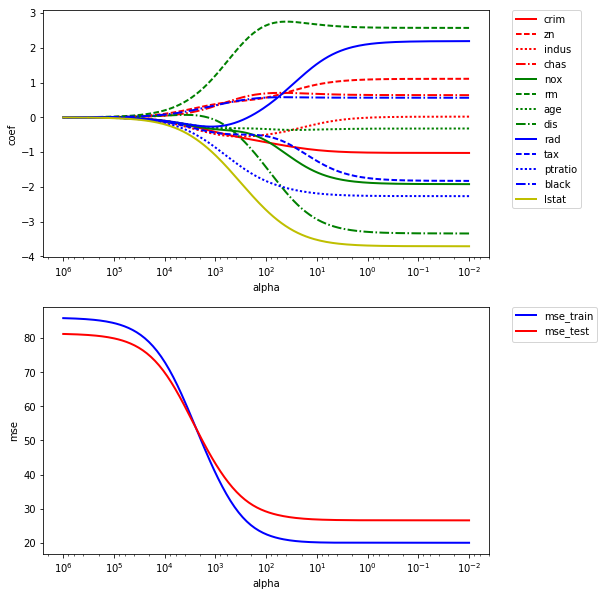

In [15]:
plot_reg(X_train, y_train, X_test, y_test, Ridge, min_power=-2, max_power=6, coef_names=boston.columns[:-1])

Поиск оптимального параметра регуляризации по кросс-валидации.

In [16]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-2, 6, num=200)
ridgeregCV = RidgeCV(alphas=alphas, cv=5)
ridgeregCV.fit(X_train, y_train)

y_train_ridgeregCV = ridgeregCV.predict(X_train)
y_test_ridgeregCV = ridgeregCV.predict(X_test)

print('Alpha: %.2e' % ridgeregCV.alpha_)
print('MSE на обучающей выборке: %.4f' % mean_squared_error(y_train, y_train_ridgeregCV))
print('MSE на тестовой выборке: %.4f' % mean_squared_error(y_test, y_test_ridgeregCV))

print('\nДоля объясненной диспперсии на обучающей выборке: %.4f' % explained_variance_score(y_train, y_train_ridgeregCV))
print('Доля объясненной дисперсии на тестовой выборке: %.4f' % explained_variance_score(y_test, y_test_ridgeregCV))

print('\nКоэффициенты:')
print('\n'.join([': '.join([boston.columns[i], "%.4f" % ridgeregCV.coef_[i]]) for i in xrange(X_train.shape[1])]))

Alpha: 1.14e+01
MSE на обучающей выборке: 20.1361
MSE на тестовой выборке: 26.8532

Доля объясненной диспперсии на обучающей выборке: 0.7660
Доля объясненной дисперсии на тестовой выборке: 0.6678

Коэффициенты:
crim: -0.9325
zn: 0.9265
indus: -0.2106
chas: 0.6785
nox: -1.5449
rm: 2.6826
age: -0.3548
dis: -2.8855
rad: 1.4743
tax: -1.2057
ptratio: -2.1777
black: 0.5713
lstat: -3.5018


Посмотрим, изменились ли значения коэффициентов по сравнению с нерегуляризованной моделью.

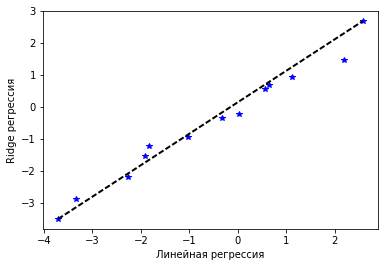

In [17]:
plt.plot(linreg.coef_, ridgeregCV.coef_, '*b')
plt.xlabel('Линейная регрессия'.decode('utf-8'))
plt.ylabel('Ridge регрессия'.decode('utf-8'))
plt.plot([np.min(linreg.coef_), np.max(linreg.coef_)], [np.min(ridgeregCV.coef_), np.max(ridgeregCV.coef_)], '--k')
plt.plot()
plt.show()

Повторим те же шаги применительно к Lasso регрессии.

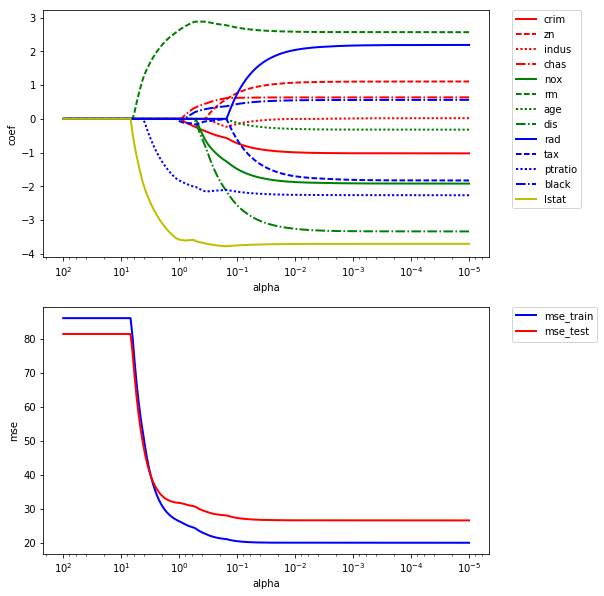

In [18]:
from sklearn.linear_model import Lasso
plot_reg(X_train, y_train, X_test, y_test, Lasso, min_power=-5, max_power=2, coef_names=boston.columns[:-1])

In [19]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-5, 2, num=200)
lassoregCV = LassoCV(alphas=alphas, cv=5)
lassoregCV.fit(X_train, y_train)

y_train_lassoregCV = lassoregCV.predict(X_train)
y_test_lassoregCV = lassoregCV.predict(X_test)

print('Alpha: %.2e' % lassoregCV.alpha_)
print('MSE на обучающей выборке: %.4f' % mean_squared_error(y_train, y_train_lassoregCV))
print('MSE на тестовой выборке: %.4f' % mean_squared_error(y_test, y_test_lassoregCV))

print('\nДоля объясненной диспперсии на обучающей выборке: %.4f' % explained_variance_score(y_train, y_train_lassoregCV))
print('Доля объясненной дисперсии на тестовой выборке: %.4f' % explained_variance_score(y_test, y_test_lassoregCV))

print('\nКоэффициенты:')
print('\n'.join([': '.join([boston.columns[i], "%.4f" % lassoregCV.coef_[i]]) for i in xrange(X_train.shape[1])]))

Alpha: 2.20e-02
MSE на обучающей выборке: 20.0080
MSE на тестовой выборке: 26.6355

Доля объясненной диспперсии на обучающей выборке: 0.7675
Доля объясненной дисперсии на тестовой выборке: 0.6708

Коэффициенты:
crim: -0.9574
zn: 1.0342
indus: -0.0169
chas: 0.6359
nox: -1.8253
rm: 2.6026
age: -0.2757
dis: -3.1696
rad: 1.8734
tax: -1.5622
ptratio: -2.2433
black: 0.5364
lstat: -3.7189


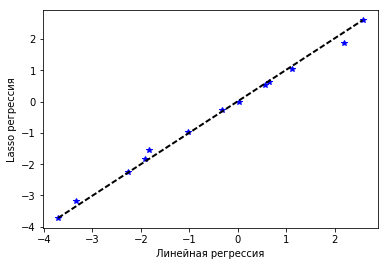

In [20]:
plt.plot(linreg.coef_, lassoregCV.coef_, '*b')
plt.xlabel('Линейная регрессия'.decode('utf-8'))
plt.ylabel('Lasso регрессия'.decode('utf-8'))
plt.plot([np.min(linreg.coef_), np.max(linreg.coef_)], [np.min(lassoregCV.coef_), np.max(lassoregCV.coef_)], '--k')
plt.plot()
plt.show()

Качество модели, практически, не зависит от наличия регуляризации. Поэтому попробуем добавить признаки степени два, т.е. если в данных есть признаки $X_i, X_j$, то добавим признаки вида $X_iX_j$, где $i=1,...,p$ и $j=1,...,p$ ($p$ - число признаков).

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_2 = StandardScaler().fit_transform(poly.fit_transform(X)) # стандартизируем, так как добавили новые признаки
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y, test_size=.33, random_state=0)

feature_names = poly.get_feature_names(boston.columns[:-1])
print(feature_names)

['1', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'crim^2', 'crim zn', 'crim indus', 'crim chas', 'crim nox', 'crim rm', 'crim age', 'crim dis', 'crim rad', 'crim tax', 'crim ptratio', 'crim black', 'crim lstat', 'zn^2', 'zn indus', 'zn chas', 'zn nox', 'zn rm', 'zn age', 'zn dis', 'zn rad', 'zn tax', 'zn ptratio', 'zn black', 'zn lstat', 'indus^2', 'indus chas', 'indus nox', 'indus rm', 'indus age', 'indus dis', 'indus rad', 'indus tax', 'indus ptratio', 'indus black', 'indus lstat', 'chas^2', 'chas nox', 'chas rm', 'chas age', 'chas dis', 'chas rad', 'chas tax', 'chas ptratio', 'chas black', 'chas lstat', 'nox^2', 'nox rm', 'nox age', 'nox dis', 'nox rad', 'nox tax', 'nox ptratio', 'nox black', 'nox lstat', 'rm^2', 'rm age', 'rm dis', 'rm rad', 'rm tax', 'rm ptratio', 'rm black', 'rm lstat', 'age^2', 'age dis', 'age rad', 'age tax', 'age ptratio', 'age black', 'age lstat', 'dis^2', 'dis rad', 'dis tax', 'dis ptratio', 'dis blac

Обучим, для начала, линейную модель.

In [22]:
linreg = LinearRegression().fit(X_train2, y_train2)

y_train2_linreg = linreg.predict(X_train2)
y_test2_linreg = linreg.predict(X_test2)

print('MSE на обучающей выборке: %.4f' % mean_squared_error(y_train2, y_train2_linreg))
print('MSE на тестовой выборке: %.4f' % mean_squared_error(y_test2, y_test2_linreg))

print('\nДоля объясненной диспперсии на обучающей выборке: %.4f' % explained_variance_score(y_train2, y_train2_linreg))
print('Доля объясненной дисперсии на тестовой выборке: %.4f' % explained_variance_score(y_test2, y_test2_linreg))

MSE на обучающей выборке: 4.1212
MSE на тестовой выборке: 27.7183

Доля объясненной диспперсии на обучающей выборке: 0.9521
Доля объясненной дисперсии на тестовой выборке: 0.6642


Кажется, модель переобучилась. 

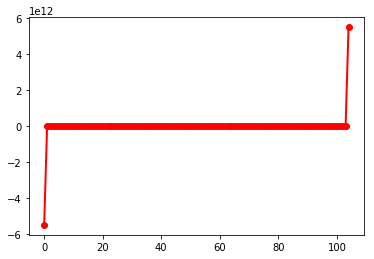

In [23]:
plt.plot(np.arange(len(linreg.coef_)), np.sort(linreg.coef_), '-o')
plt.show()

In [24]:
print(feature_names[np.argmin(linreg.coef_)], feature_names[np.argmax(linreg.coef_)])

('chas^2', 'chas')


Два признака имеют очень большие по модулю веса по сравнению с другими признаками. Это верный признак переобучения.

Посомтрим, что изменится при обучении Risge регрессии.

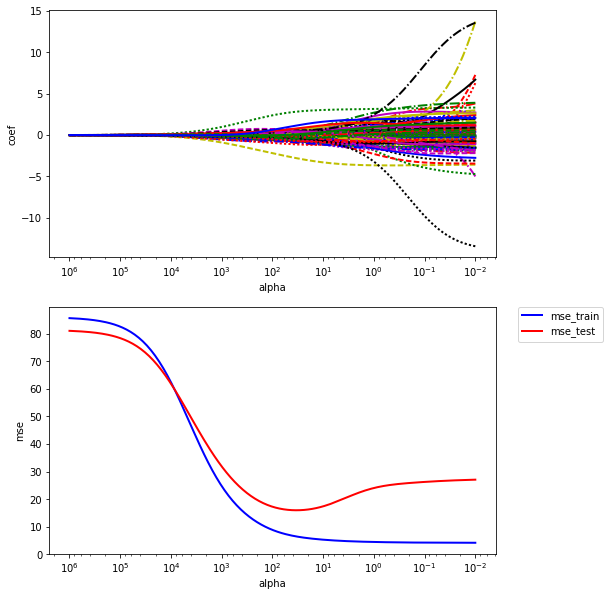

In [25]:
plot_reg(X_train2, y_train2, X_test2, y_test2, Ridge, min_power=-2, max_power=6)

In [26]:
alphas = np.logspace(-2, 6, num=200)
ridgeregCV = RidgeCV(alphas=alphas, cv=5)
ridgeregCV.fit(X_train2, y_train2)

y_train2_ridgeregCV = ridgeregCV.predict(X_train2)
y_test2_ridgeregCV = ridgeregCV.predict(X_test2)

print('Alpha: %.2e' % ridgeregCV.alpha_)
print('MSE на обучающей выборке: %.4f' % mean_squared_error(y_train2, y_train2_ridgeregCV))
print('MSE на тестовой выборке: %.4f' % mean_squared_error(y_test2, y_test2_ridgeregCV))

print('\nДоля объясненной диспперсии на обучающей выборке: %.4f' % explained_variance_score(y_train2, y_train2_ridgeregCV))
print('Доля объясненной дисперсии на тестовой выборке: %.4f' % explained_variance_score(y_test2, y_test2_ridgeregCV))

Alpha: 1.98e+01
MSE на обучающей выборке: 5.8281
MSE на тестовой выборке: 16.2399

Доля объясненной диспперсии на обучающей выборке: 0.9323
Доля объясненной дисперсии на тестовой выборке: 0.8030


Разница в значениях ошибки сократилась. Качество модели на тестовой выборке значительно выросло.

In [27]:
print('Число коэффициентов, равных 0: %i' % np.sum(ridgeregCV.coef_ == 0))

Число коэффициентов, равных 0: 1


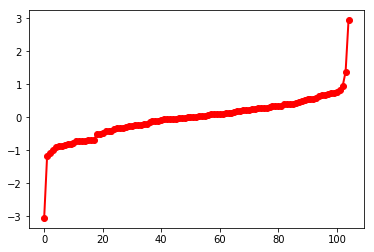

In [28]:
plt.plot(np.arange(len(ridgeregCV.coef_)), np.sort(ridgeregCV.coef_), '-o')
plt.show()

In [29]:
print('Признак с максимальным коэффициентом: %s' % feature_names[np.argmax(ridgeregCV.coef_)])
print('Признак с минимальным коэффициентом: %s' % feature_names[np.argmin(ridgeregCV.coef_)])

Признак с максимальным коэффициентом: rm
Признак с минимальным коэффициентом: lstat


При этом значения всех коэффициентов сравнимы и не отличаются на порядки.

Посмотрим, как отработает Lasso.

C:\Anaconda3\envs\py27\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


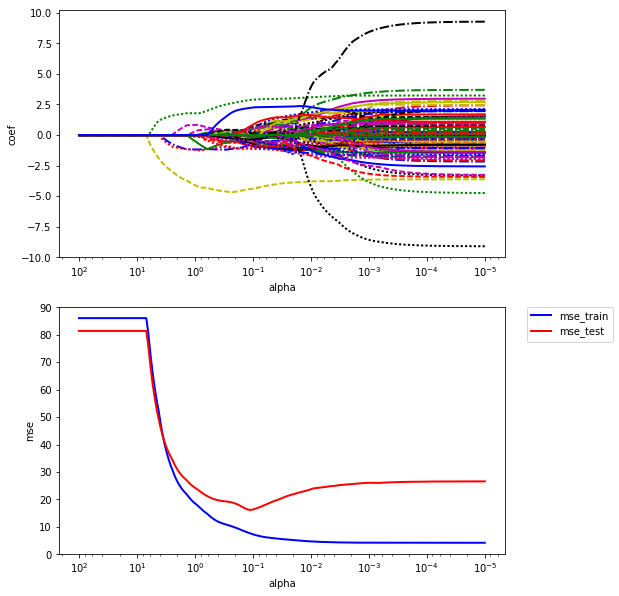

In [30]:
plot_reg(X_train2, y_train2, X_test2, y_test2, Lasso, min_power=-5, max_power=2)

In [31]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-5, 2, num=200)
lassoregCV = LassoCV(alphas=alphas, cv=5)
lassoregCV.fit(X_train2, y_train2)

y_train2_lassoregCV = lassoregCV.predict(X_train2)
y_test2_lassoregCV = lassoregCV.predict(X_test2)

print('Alpha: %.2e' % lassoregCV.alpha_)
print('MSE на обучающей выборке: %.4f' % mean_squared_error(y_train2, y_train2_lassoregCV))
print('MSE на тестовой выборке: %.4f' % mean_squared_error(y_test2, y_test2_lassoregCV))

print('\nДоля объясненной диспперсии на обучающей выборке: %.4f' % explained_variance_score(y_train2, y_train2_lassoregCV))
print('Доля объясненной дисперсии на тестовой выборке: %.4f' % explained_variance_score(y_test2, y_test2_lassoregCV))

Alpha: 4.55e-02
MSE на обучающей выборке: 5.9437
MSE на тестовой выборке: 19.2251

Доля объясненной диспперсии на обучающей выборке: 0.9309
Доля объясненной дисперсии на тестовой выборке: 0.7676


Результаты чуть хуже, чем при Ridge регрессии, но значительно лучше, чем в случае линейной регресии.

In [32]:
print('Число коэффициентов, равных 0: %i' % np.sum(lassoregCV.coef_ == 0))

Число коэффициентов, равных 0: 56


Более того, значительная часть коэффициентов обратилась в 0, т.е. Lasso позволяет осуществлять отбор признаков.

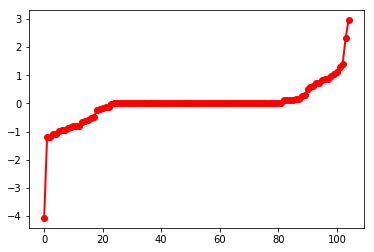

In [33]:
plt.plot(np.arange(len(lassoregCV.coef_)), np.sort(lassoregCV.coef_), '-o')
plt.show()

In [34]:
print('Признак с максимальным коэффициентом: %s' % feature_names[np.argmax(lassoregCV.coef_)])
print('Признак с минимальным коэффициентом: %s' % feature_names[np.argmin(lassoregCV.coef_)])

Признак с максимальным коэффициентом: rm
Признак с минимальным коэффициентом: lstat


Значения коэффициентов также сопоставимы и не отличаются на порядки.

Посмотрим, как для этих моделей значение коэффициентов зависит от разделения на обучающую и тестовую выборки.

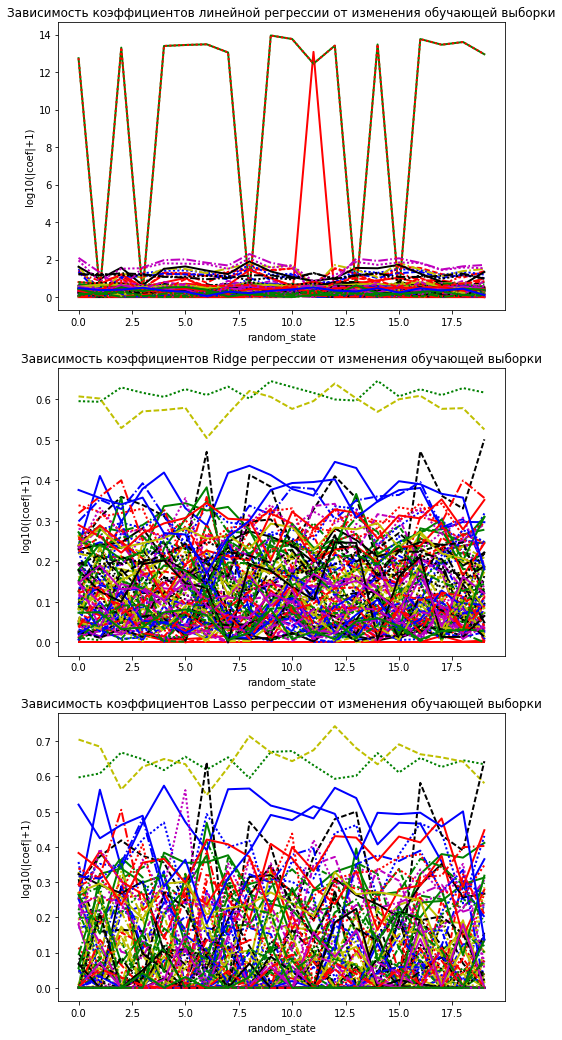

In [35]:
random_states = np.arange(20)
n_rs = len(random_states)
linreg_coefs = np.zeros((n_rs, X_2.shape[1]))
ridge_coefs = np.zeros((n_rs, X_2.shape[1]))
lasso_coefs = np.zeros((n_rs, X_2.shape[1]))
for i, rs in enumerate(random_states):
    X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_2, y, test_size=0.33, random_state=rs)
    linreg_coefs[i,:] = LinearRegression().fit(X_train_rs, y_train_rs).coef_
    ridge_coefs[i, :] = Ridge(alpha=ridgeregCV.alpha_).fit(X_train_rs,y_train_rs).coef_
    lasso_coefs[i, :] = Lasso(alpha=lassoregCV.alpha_).fit(X_train_rs, y_train_rs).coef_

    
plt.rc('lines', linewidth=2)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'k', 'm']) * cycler('linestyle', ['-', '--', ':', '-.'])))  

fig, (ax_lin, ax_ridge, ax_lasso) = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))

ax_lin.plot(random_states, np.log10(np.abs(linreg_coefs)+1))
ax_lin.set_xlabel('random_state')
ax_lin.set_ylabel('log10(|coef|+1)')
ax_lin.set_title('Зависимость коэффициентов линейной регрессии от изменения обучающей выборки'.decode('utf-8'))

ax_ridge.plot(random_states, np.log10(np.abs(ridge_coefs)+1))
ax_ridge.set_xlabel('random_state')
ax_ridge.set_ylabel('log10(|coef|+1)')
ax_ridge.set_title('Зависимость коэффициентов Ridge регрессии от изменения обучающей выборки'.decode('utf-8'))

ax_lasso.plot(random_states, np.log10(np.abs(lasso_coefs)+1))
ax_lasso.set_xlabel('random_state')
ax_lasso.set_ylabel('log10(|coef|+1)')
ax_lasso.set_title('Зависимость коэффициентов Lasso регрессии от изменения обучающей выборки'.decode('utf-8'))

plt.show()

И Ridge, и Lasso в целом сущестевенно сокращают неустойчивость оценок коэффициентов. Давайте посмотрим, что при этом происходит с сильно корелированными переменными на примере переменных tax, rad и производных от них признаков.

In [36]:
tax_rad_idx = [i for i, name in enumerate(feature_names) if name in ['tax', 'rad', 'tax rad', 'rad tax', 'tax^2', 'rad^2']]
feature_names = np.array(feature_names)
print(feature_names[tax_rad_idx])

['rad' 'tax' 'rad^2' 'rad tax' 'tax^2']


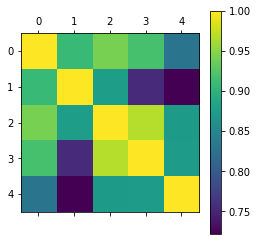

In [37]:
plt.matshow(np.corrcoef(X_2[:, tax_rad_idx].T))
plt.colorbar()
plt.show()

Корреляция между всеми признаками достаточно большая. Как для них менялись коэффициенты в Ridge и Lasso регрессии.

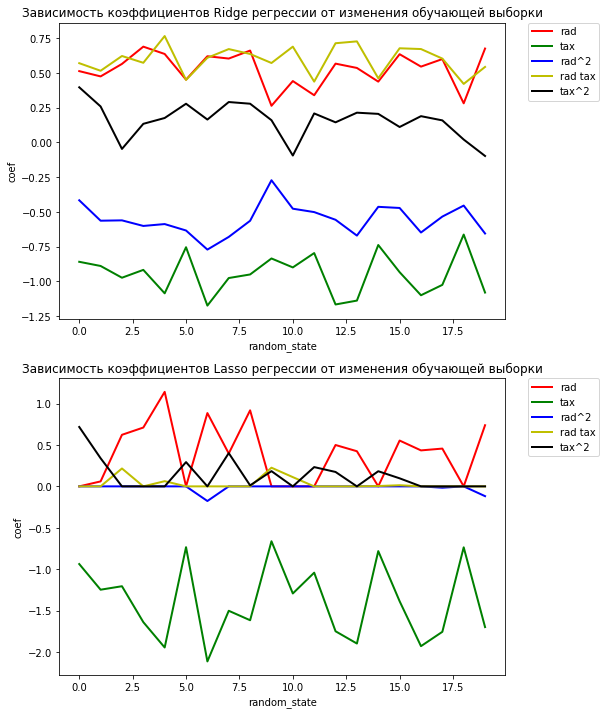

In [38]:
plt.rc('lines', linewidth=2)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'k', 'm'])))  

fig, (ax_ridge, ax_lasso) = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

ax_ridge.plot(random_states, ridge_coefs[:, tax_rad_idx])
ax_ridge.set_xlabel('random_state')
ax_ridge.set_ylabel('coef')
ax_ridge.set_title('Зависимость коэффициентов Ridge регрессии от изменения обучающей выборки'.decode('utf-8'))
ax_ridge.legend(feature_names[tax_rad_idx], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax_lasso.plot(random_states, lasso_coefs[:, tax_rad_idx])
ax_lasso.set_xlabel('random_state')
ax_lasso.set_ylabel('coef')
ax_lasso.legend(feature_names[tax_rad_idx], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax_lasso.set_title('Зависимость коэффициентов Lasso регрессии от изменения обучающей выборки'.decode('utf-8'))

plt.show()

Если при каждом разбиении на тестовую и обучающую выборки упорядочить признаки по значениям коэффициентов, то порядок признаков в при Ridge регрессии меньше зависит от разбиения. Т.е. Lasso регрессия оказывается более нестабильной к изменениям выборки.

Можно пробовать совместить достоинства двух видов регуляризации при помощи ElasticNet. Воспользуемся сразу подбором параметров на кросс-валидации для ElasticNet.

In [39]:
from sklearn.linear_model import ElasticNetCV

elasticnetCV = ElasticNetCV(alphas=np.logspace(-5, 5, num=200), 
                            l1_ratio = np.arange(0, 1.1, 0.1), 
                            random_state=100, 
                            cv=5, 
                            n_jobs=4)
elasticnetCV.fit(X_train2, y_train2)

y_train2_enet = elasticnetCV.predict(X_train2)
y_test2_enet = elasticnetCV.predict(X_test2)

print('Параметр регуляризации: %.4f' % elasticnetCV.alpha_)
print('Доля Lasso компоненты: %.4f' % elasticnetCV.l1_ratio_)

print('\nMSE на обучающей выборке: %.4f' % mean_squared_error(y_train2, y_train2_enet))
print('MSE на тестовой выборке: %.4f' % mean_squared_error(y_test2, y_test2_enet))

print('\nДоля объясненной диспперсии на обучающей выборке: %.4f' % explained_variance_score(y_train2, y_train2_enet))
print('Доля объясненной дисперсии на тестовой выборке: %.4f' % explained_variance_score(y_test2, y_test2_enet))

C:\Anaconda3\envs\py27\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


Параметр регуляризации: 0.0659
Доля Lasso компоненты: 0.0000

MSE на обучающей выборке: 5.9517
MSE на тестовой выборке: 16.1289

Доля объясненной диспперсии на обучающей выборке: 0.9308
Доля объясненной дисперсии на тестовой выборке: 0.8042


Доля Lasso равна 0, т.е. предпочтение отдано чистой Ridge регрессии, хотя можно попробовать меньший шаг для l1_ratio.

Качество предсказания также снижает наличие выбросов в данных. Среди методов, представленных в scikit-learn устойчивостью к выбросам и изменению выборки обладает метод RANSAC. Подробности можно найти по ссылке: http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression. Мы лишь попробуем его применить для Ridge регрессии c оптимальным на кросс-валидации параметром регуляризации.

In [40]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(base_estimator=RidgeCV(alphas=np.logspace(-5, 5, num=10), cv=5), 
                         min_samples=.85,
                         random_state=0)

ransac.fit(X_train2, y_train2)
inlier_mask = ransac.inlier_mask_ # запомним, какие объекты считаются внутренними
outlier_mask = np.logical_not(inlier_mask) # а какие выбросами

y_train2_ransac = ransac.predict(X_train2)
y_test2_ransac = ransac.predict(X_test2)

print('\nMSE на обучающей выборке: %.4f' % mean_squared_error(y_train2, y_train2_ransac))
print('MSE на тестовой выборке: %.4f' % mean_squared_error(y_test2, y_test2_ransac))

print('\nДоля объясненной диспперсии на обучающей выборке: %.4f' % explained_variance_score(y_train2, y_train2_ransac))
print('Доля объясненной дисперсии на тестовой выборке: %.4f' % explained_variance_score(y_test2, y_test2_ransac))


MSE на обучающей выборке: 7.5495
MSE на тестовой выборке: 16.8129

Доля объясненной диспперсии на обучающей выборке: 0.9123
Доля объясненной дисперсии на тестовой выборке: 0.7980


Красным цветом обозначены выбросы


C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 506 but corresponding boolean dimension is 339
C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 506 but corresponding boolean dimension is 339
C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 506 but corresponding boolean dimension is 339
C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 506 but corresponding boolean dimension is 339


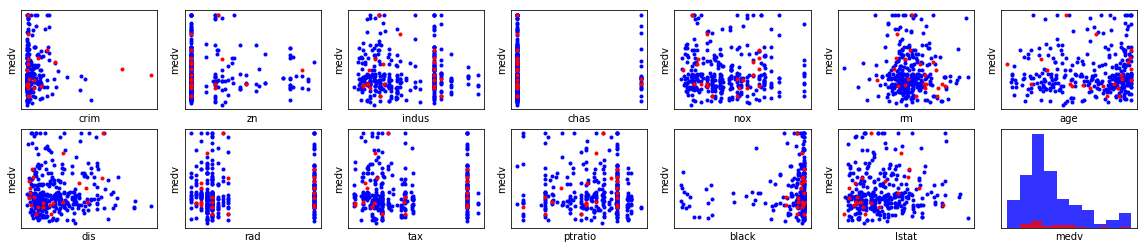

In [41]:
print('Красным цветом обозначены выбросы')

fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20,4))
for i in xrange(X.shape[1]):
    row_index = i//7
    col_index = i%7
    axes[row_index, col_index].plot(X_train2[inlier_mask, i+1], y[inlier_mask], '.b')
    axes[row_index, col_index].plot(X_train2[outlier_mask, i+1], y[outlier_mask], '.r')
    axes[row_index, col_index].set_xlabel(feature_names[i+1])
    axes[row_index, col_index].set_ylabel(target_column)
    axes[row_index, col_index].set_xticks([])
    axes[row_index, col_index].set_yticks([])

axes[1, 6].hist(y[inlier_mask], alpha=0.8, color='b')
axes[1, 6].hist(y[outlier_mask], alpha=0.8, color='r')
axes[1, 6].set_xticks([])
axes[1, 6].set_yticks([])
axes[1, 6].set_xlabel(target_column)
plt.show()

Также как и для классификации можно оценивать качество моделей на кросс-валидации. Применение кросс-валидации для регрессии аналогично кросс-валидации для классификации (см. тетрадку по классификации).